In [17]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [18]:
X_train = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/train_X.csv").T.values
Y_train = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/train_label.csv").T.values

X_test = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/test_X.csv").T.values
Y_test = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/test_label.csv").T.values

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 999)
(10, 999)
(784, 349)
(10, 349)


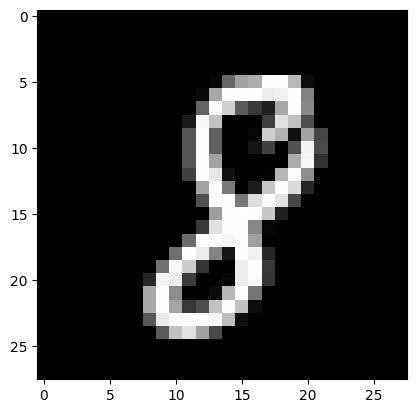

In [19]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28),cmap='gray')
plt.show()

#### ANN with single layer

# Model


## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


In [20]:
def tanh(x):
    return np.tanh(x);

def relu(x):
    return np.maximum(0,x);

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX,axis=0);

In [21]:
def derivative_tanh(x):
    return (1 - np.power(x,2))

def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)  

#### Initialise Parameters

In [22]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)*0.001
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)*0.001
    b2 = np.zeros((n_y,1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

### Forward Propagation

In [23]:
def forward_propagation(x,parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1,x)+b1
    a1 = relu(z1)

    z2 = np.dot(w2,a1)+b2
    a2 = softmax(z2)    

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

#### Cost Function

In [24]:
def cost_func(a2,y):
    m = y.shape[1]

    cost = -(1/m)*np.sum(y*np.log(a2))

    return cost


# Backpropagation

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [25]:
def back_propagation(x,y,parameters,forward_cache):

    m = x.shape[1]
    
    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    z1 = forward_cache['z1']
    z2 = forward_cache['z2']

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2,axis=1,keepdims = True)

    dz1 = np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1,axis=1,keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

    


## Update Parameters

In [26]:
def update_parameters(parameters,gradients,learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

In [27]:
def model(x,y,n_h,learning_rate,epochs):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x,n_h,n_y)

    for i in range(epochs):
        
        forward_cache = forward_propagation(x,parameters)
        cost = cost_func(forward_cache['a2'],y)
        cost_list.append(cost)
        gradients = back_propagation(x,y,parameters,forward_cache)
        parameters = update_parameters(parameters,gradients,learning_rate)

    
    return parameters,cost_list

## Code Done!. Let's call the Model

In [28]:
epochs = 100
learning_rate = 0.001
n_h = 1000
parameters,cost_list = model(X_train,Y_train,n_h = n_h,learning_rate = learning_rate,epochs = epochs)
cost_list

[2.308931640893288,
 2.2512247805038132,
 2.196123821024147,
 2.139820945414306,
 2.0797396268602455,
 2.0144065995284337,
 1.9430039904759258,
 1.86566473585903,
 1.7832665946733612,
 1.6971399723161569,
 1.609105430448817,
 1.521279413798384,
 1.4354626875220615,
 1.3533268691555111,
 1.2760786713887908,
 1.2044142244063365,
 1.138610294973642,
 1.0786003698676168,
 1.0241098258770416,
 0.9747333823196788,
 0.9300155951628306,
 0.8894739791117726,
 0.8526404186618951,
 0.8190816216983147,
 0.7884213981527766,
 0.7603123305781677,
 0.7344605932801027,
 0.7106066942051835,
 0.6885397319938628,
 0.6680599987917143,
 0.6490069077704526,
 0.6312338186110696,
 0.6146077003160152,
 0.5990218404478757,
 0.5843718724036124,
 0.5705724551871819,
 0.5575515616439484,
 0.5452395374896399,
 0.5335763414363724,
 0.5225092203849757,
 0.511989171680407,
 0.5019733453218518,
 0.4924222079201254,
 0.4833022242316249,
 0.4745832901911273,
 0.46623731833765364,
 0.4582346921231377,
 0.4505522412687854,


Cost vs Epoch Graph


<function matplotlib.pyplot.show(close=None, block=None)>

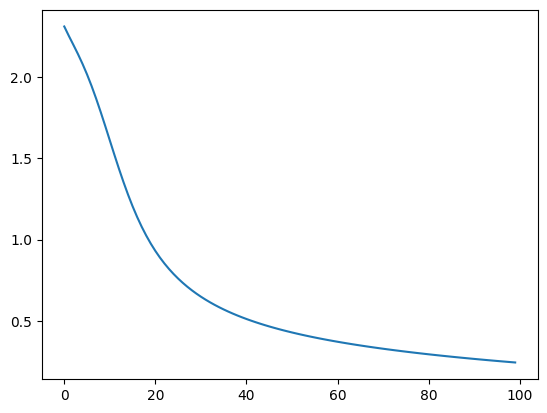

In [29]:
rng = np.arange(0,epochs)   
plt.plot(rng,cost_list)
plt.show

In [30]:
def accuracy(x,y,parameters):
    forward_cache = forward_propagation(x,parameters)

    a_out = forward_cache['a2']
    #* a_out here is an array of shape(10,999) having values actually probabilities of each index(i.e from 0 to 9) for all images.

    a_out = np.argmax(a_out,0)
    #* 0 in the argument is to check by row and return index which have highest probability.
    #* a_out will have index value which has highest probability for all 1000 images.

    y_out = np.argmax(y,0)

    acc = np.mean(a_out == y_out)*100

    return acc


### Calculating Accuracy of Training and Testing Datasets

In [31]:
acc1 = accuracy(X_train,Y_train,parameters)
acc2 = accuracy(X_test,Y_test,parameters)
print(acc1)
print(acc2)

95.09509509509509
86.24641833810888


Cool Thing!!!


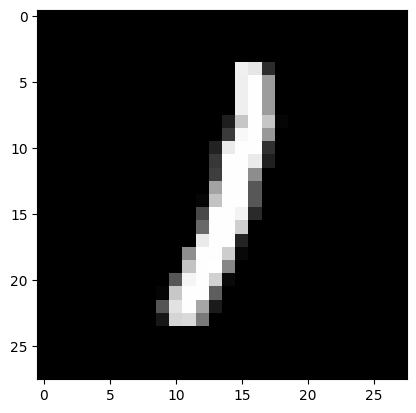

Our Model says, it is :  1


In [32]:
index = random.randrange(0,X_test.shape[1])
plt.imshow(X_test[:, index].reshape(28,28),cmap='gray')
plt.show()

forward_cache = forward_propagation(X_test[:, index].reshape(X_test.shape[0],1),parameters)

#* Here X_test[:, index] is a single row with 784 columns but x parameter in forward propagation should be of (n,m) where n is no of features 
#* 784 in this problem and m is no of observation i.e 1000 images for training and 350 for testing.

a_out = forward_cache['a2']
#* a_out here is an array of 10 values actually probabilities of each index(i.e from 0 to 9).

a_out = np.argmax(a_out,0)
#* argmax will return the value at index which has highest probability.

print("Our Model says, it is : ", a_out[0])